In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

# Lecture 09 

## Review: Lecture 04/05 (bootstrap)
From a random sample, construct a 95% confidence interval for the ages of the mothers in the population.

In [2]:
# original sample

births = Table.read_table('data/baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


**Task**
- define a function to generate a single bootstrap mean of the Maternal Age
- generate 3000 bootstrap means
- calculate the endpoints of the 95% confidence interval (using `percentile()`)
- generate a plot of the bootstrap mean distribution and the confidence interval (a yellow bar at y=0)

In [7]:
def one_bootstrap_mean():
    #generate a sample of the same size from births
    # sample WITH replacement, by default .sample() does this
    resample = births.sample()
    avg_age = np.average(resample.column('Maternal Age'))
    return avg_age

In [8]:
one_bootstrap_mean()

27.380749574105621

In [10]:
# generate means from 3_000 bootstrap samples
num_repetitions = 3_000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

In [12]:
len(bstrap_means)

3000

In [13]:
# get the endpoints of the 95% confidence interval
# it should start at 2.5% and end at 97.5%
# this gives us the middle 95%

left = percentile(2.5, bstrap_means) # percentile does a sorting for us, so we are grabbing the 2.5% value in an ordered array
right = percentile(97.5, bstrap_means)

left, right # the 95% confidence interval we generate is 26.9 - 27.56 years old, which we HOPE captures the True average maternal age

(26.902044293015333, 27.56984667802385)

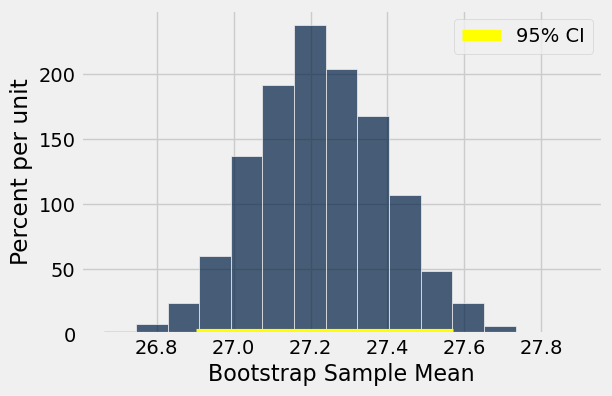

In [18]:
# add our bstrap_means to a table
# generate a histogram
# and also plot our confidence interval

resampled_means = Table().with_column('Bootstrap Sample Mean', bstrap_means)
resampled_means.hist(bins = 15) # try and see what happens when you don't specify bins
plots.plot([left, right], [0, 0], color = 'yellow', lw=8, label='95% CI')
# same logic applies for plotting one point
#plots.plot(x, y, color = 'red', s = 8, label='population average', marker = 'o')
plots.legend();

## Method Based on CLT

**Tasks**

calculate the 
- sample size
- sample average
- sample SD

In [20]:
# population: US first-time mothers
# births is our original sample of the population
sampled_ages = births.column('Maternal Age')
sample_size = len(sampled_ages)
sample_average = np.average(sampled_ages)
sample_SD = np.std(sampled_ages)

print(f"Sample Size: {sample_size}")
print(f"Sample Average: {sample_average}")
print(f"Sample SD: {sample_SD}")

Sample Size: 1174
Sample Average: 27.228279386712096
Sample SD: 5.815360404190897


If we knew our population SD, we could get our sample average SD from 

sample_SD = pop_SD / (sample_size)** 1/2

And then construct our confidence interval as $[\mu - 2*\sigma_{sm}, \mu + 2*\sigma_{sm}]$
same thing as (average - 2*SD, average + 2*SD)

But we don't have the population SD. ... therefore we replace the population SD with the sample SD.

**Task**
- calculate the SD of sample averages from the sample SD and the sample size
- calculate the confidence interval
- compare the CLT confidence interval to the bootstrap confidence interval

In [21]:
# try estimating the sample SD from our original sample
# our original sample becomes a placeholder for the population, since we don't have access to the population (all US mothers)

estimated_SD_of_sample_avg = sample_SD / (sample_size**0.5) # np.sqrt(sample_size)
estimated_SD_of_sample_avg
# SD = 0.169 years ~ 2 months

0.16972373742299796

In [25]:
# approx 95% confidence interval for pop mean
# from our bootstrapping

(right - left)/4
#our sample SD from our empirical distribution we generated above using bootstrapping was similar
# 0.167 years ~ 2 months
(left, right)

(26.902044293015333, 27.56984667802385)

In [26]:
# check our estimated_SD_of_sample_avg gets us the similar confidence interval
# (average - 2*SD, average + 2 * SD)
sample_average - 2*estimated_SD_of_sample_avg, sample_average + 2*estimated_SD_of_sample_avg

(26.888831911866099, 27.567726861558093)

In [27]:
0.02*12 #one week difference

0.24

---
back to slides

---

## SD of 0/1 population

**Tasks**
- generate a population of 10 containing zeros and ones with e.g. 4 ones and 6 zeros
- calculate the standard deviation of the population
- **Question:** Change the number of ones. What is the maximum standard deviation?

In [28]:
# population of size 10

number_of_ones = 4
zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))

print(f"Population: {zero_one_population}")
print(f"Standard Deviation: {np.round(np.std(zero_one_population),2)}")

Population: [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
Standard Deviation: 0.49


In [29]:
sum(zero_one_population)

4.0

In [30]:
np.average(zero_one_population) # proportion of 1s in our population

0.40000000000000002

**Task**
- Calculate the SDs for numbers of ones ranging from 0 to 10 (create a function)
- Make a scatter plot of the population SD vs the proportion of ones (create a table first)

In [31]:
def sd_of_zero_one_pop(num_ones):
    '''
    Return SD of a population
    that has 10 elements: num_ones with value 1 and (10 - num_ones) with value 0
    '''
    zero_one_population = np.append(np.ones(num_ones), np.zeros(10 - num_ones))
    pop_sd = np.std(zero_one_population)
    return pop_sd


In [34]:
possible_ones = np.arange(11) # 0, 1, ...10
zero_one_pop = Table().with_columns(
    'Number of Ones', possible_ones,
    'Proportion of Ones', possible_ones / 10
)
zero_one_pop.show()

Number of Ones,Proportion of Ones
0,0
1,0.1
2,0.2
3,0.3
4,0.4
5,0.5
6,0.6
7,0.7
8,0.8
9,0.9


In [36]:
sds = zero_one_pop.apply(sd_of_zero_one_pop, 'Number of Ones')
# use .apply on our zero_one_pop table
# we apply the function sd_of_zero_pop, which takes in the 'Number of Ones' column as input, from our zero_one_pop table
# what returns is an array
sds

array([ 0.        ,  0.3       ,  0.4       ,  0.45825757,  0.48989795,
        0.5       ,  0.48989795,  0.45825757,  0.4       ,  0.3       ,
        0.        ])

In [37]:
zero_one_pop = zero_one_pop.with_column('Pop SD', sds)
zero_one_pop.show()

Number of Ones,Proportion of Ones,Pop SD
0,0,0
1,0.1,0.3
2,0.2,0.4
3,0.3,0.458258
4,0.4,0.489898
5,0.5,0.5
6,0.6,0.489898
7,0.7,0.458258
8,0.8,0.4
9,0.9,0.3


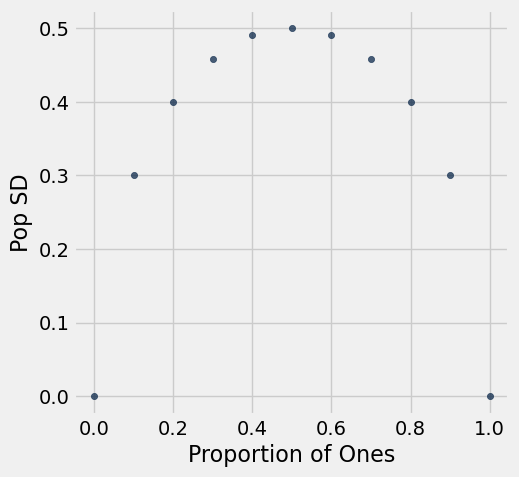

In [38]:
zero_one_pop.scatter('Proportion of Ones', 'Pop SD')